In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Normalization and Scaling 

## Standardization

We can not compare (or get useful insight) of measurements that have different units. That's why it's useful to standardize the features - usually **to center the input values arround 0  with a standard deviation of 1**. 

This is also, a general requirement for many machine learning algorithms, and generaly everywhere we want all features to contribute equally, like:

- k-nearest neighbors with an Euclidean distance measure
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. - where the gradient descent optimization is used.
- linear discriminant analysis, principal component analysis, kernel principal component analysis

In practice, for standardization is used the "Z-score normalization" function, which will rescale the feature, so that they’ll have the properties of a standard normal distribution, calculated by:
$$ z = \frac{(x - u)}{s} $$



where **u** is the mean (average) and **s** is the standard deviation from the mean; 
Standard scores (also called z scores) of the samples are calculated for each input value.

Scikit-learn implement the Z-score normalization with the class: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

## Z-score normalization example

In [13]:
# generate some data:
N = 100
M = 2

data = np.random.choice(a=1000, size=(N, M))
df = pd.DataFrame(data)
df.head(3)

,0,1
0,923,141
1,486,807
2,39,199


Normalize the data, using the sklearn StandardScaler class

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
print(scaler.mean_)

df_scaled = scaler.transform(df)
df_scaled[:3,:]


[444.49 482.94]


array([[ 1.67538093, -1.25451043],
       [ 0.1453367 ,  1.18891223],
       [-1.41971999, -1.04171986]])

#### Plot Initial data vs Scaled data

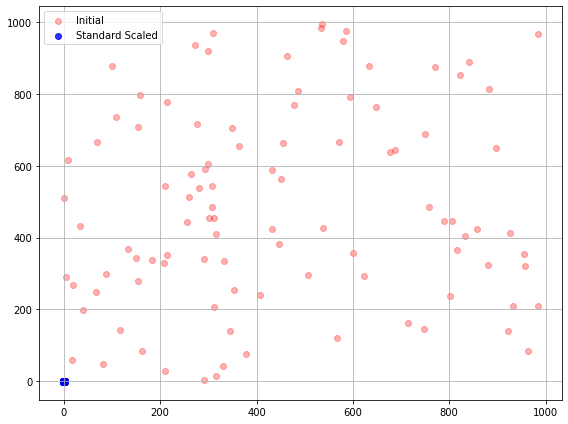

In [15]:
### Scater

plt.figure(figsize=(8,6))
plt.scatter(x=df.iloc[:, 0], y=df.iloc[:, 1], color='red', label='Initial', alpha=0.3)
plt.scatter(x=df_scaled[:, 0], y=df_scaled[:, 1], color='blue', label='Standard Scaled', alpha=0.8)

plt.legend( loc='upper left')
plt.grid()

plt.tight_layout()
# plt.title('random beta distribution')
plt.show()

Text(0.5, 1.0, 'Standard Scaled')

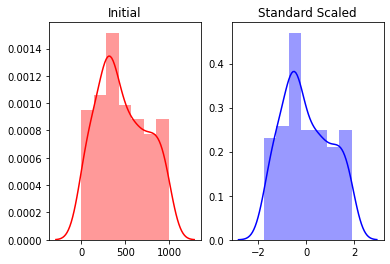

In [16]:
# distribution plot:
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0], color='red')
ax[0].set_title('Initial')

sns.distplot(df_scaled, ax=ax[1], color='blue')
ax[1].set_title('Standard Scaled')

### Min-max 